In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography'],df['Gender']=le.fit_transform(df['Geography']),le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
from sklearn.model_selection import train_test_split
x,y=df.iloc[:,:-1],df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,x_test=scaler.fit_transform(x_train),scaler.transform(x_test)

In [13]:
x_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [14]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-12-04 17:35:32.002011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764869732.223939      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764869732.287089      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [20]:
model=Sequential()# This is a sequential model in which we can add multiple layers
model.add(Dense(4,activation='sigmoid',input_dim=10)) # We are adding the first hidden layer.The hidden layer has 4 nodes. We can see that the input_dim is 10 because in input we have 10 columns(features)
model.add(Dense(1,activation='sigmoid'))# This is the output layer containing only 1 node

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['Accuracy'])

In [23]:
x_train.shape

(8000, 10)

In [24]:
history=model.fit(x_train,y_train,batch_size=100,epochs=30,verbose=1,validation_split=0.2) # history is a dictionary having 4 keys: train_acuuracy, train_loss, validation_accuracy and validation_loss and the values will be list of size 30(representing each epoch)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - Accuracy: 0.5101 - loss: 0.6978 - val_Accuracy: 0.6712 - val_loss: 0.6507
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6850 - loss: 0.6387 - val_Accuracy: 0.7750 - val_loss: 0.6002
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7745 - loss: 0.5942 - val_Accuracy: 0.7987 - val_loss: 0.5632
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7986 - loss: 0.5553 - val_Accuracy: 0.7987 - val_loss: 0.5361
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7941 - loss: 0.5340 - val_Accuracy: 0.7987 - val_loss: 0.5167
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7912 - loss: 0.5190 - val_Accuracy: 0.7987 - val_loss: 0.5024
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7900 - loss: 0.5088 - val_Accuracy: 0.7987 - val_loss: 0.4916
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7977 - loss: 0.4876 - val_Accuracy: 0.7987 - val_loss:

In [27]:
history.history.keys()

dict_keys(['Accuracy', 'loss', 'val_Accuracy', 'val_loss'])

In [28]:
y_pred=model.predict(x_test)
y_pred
# Now,these are only probabilities. We need to convert them into 0 or 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.13003185],
       [0.0864628 ],
       [0.30373693],
       ...,
       [0.37325853],
       [0.1274193 ],
       [0.14694811]], dtype=float32)

In [30]:
y_pred=(y_pred>=0.5).astype(int)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8145

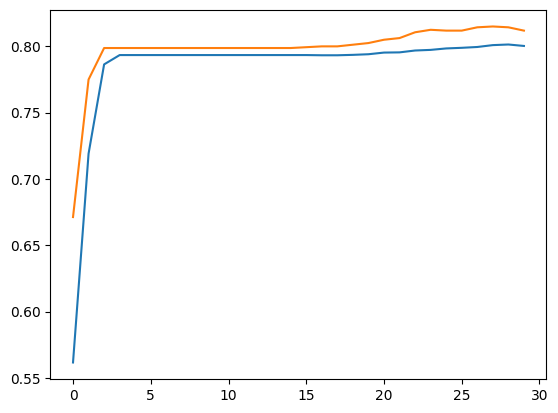

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
# This gap in between the two plots gives the extent of overfitting

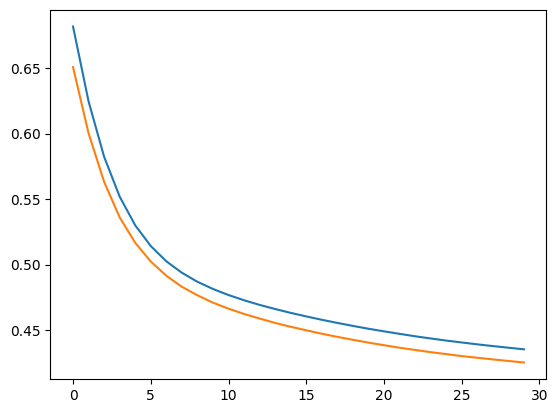

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])